In [353]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 


In [354]:

# Read in data with formatting and encoding specifications

aviation_df = pd.read_csv('AviationData.csv', encoding='ISO-8859-1', dtype={'column_name_6': 'int64', 'column_name_7': 'float64', 'column_name_28': 'float64'})
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

/Users/kariprimiano/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [355]:
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [356]:
# Format column names for standardization
# Format aircraft makes because we will need to filter and clean this column for our business problem

aviation_df["Make"] = aviation_df["Make"].str.lower()
aviation_df.columns = aviation_df.columns.str.lower().str.replace('.', '_')

In [357]:
# Drop columns that are irrelevant to our business problem and/or have over 50% null values

aviation_df.drop(columns = ["location", "registration_number", "accident_number", 
                            "latitude", "longitude", "airport_code", "airport_name", 
                            "far_description", "schedule", "air_carrier", "report_status", 
                            "publication_date"], inplace=True)


In [358]:
# Create column with the year of each event

aviation_df['event_year'] = [int(year[:4]) for year in aviation_df['event_date']]
aviation_df.head()

,event_id,investigation_type,event_date,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,event_year
0,20001218X45444,Accident,1948-10-24,United States,Fatal(2),Destroyed,NaN,stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,1948
1,20001218X45447,Accident,1962-07-19,United States,Fatal(4),Destroyed,NaN,piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,1962
2,20061025X01555,Accident,1974-08-30,United States,Fatal(3),Destroyed,NaN,cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,1974
3,20001218X45448,Accident,1977-06-19,United States,Fatal(2),Destroyed,NaN,rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,1977
4,20041105X01764,Accident,1979-08-02,United States,Fatal(1),Destroyed,NaN,cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,1979


In [359]:
aviation_df["purpose_of_flight"].value_counts()

Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: purpose_of_flight, dtype: int64

In [360]:
aviation_df["amateur_built"].value_counts()

No     80312
Yes     8475
Name: amateur_built, dtype: int64

## Data Preparation
Use these column to indicate accident severity on the majority of records

In [361]:
# Filter dates, amateur built, and purpose of flight


# Select purposes of flight that are relevant to commercial and private aircrafts
selected_purposes = ["Personal", "Business", "Executive/corporate", "Public Aircraft", "Other Work Use", "Unknown"]


# Create new df of filtered data
filtered_df = aviation_df[(aviation_df["event_year"] >= 1992) & 
                          (aviation_df["purpose_of_flight"].isin(selected_purposes)) & 
                          (aviation_df["amateur_built"] == "No") & 
                          ((aviation_df['make'].str.contains('airbus')) | 
                           (aviation_df['make'].str.contains('boeing')) | 
                           (aviation_df['make'].str.contains('cessna')) | 
                           (aviation_df['make'].str.contains('mitsubishi')) | 
                           (aviation_df['make'].str.contains('piper')) | 
                           (aviation_df['make'].str.contains('beechcraft')) | 
                           (aviation_df['make'].str.contains('"bombardier"')) | 
                           (aviation_df['make'].str.contains('embraer')) | 
                           (aviation_df['make'].str.contains('diamond')) | 
                           (aviation_df['make'].str.contains('gulfstream')))]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19053 entries, 29671 to 88888
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event_id                19053 non-null  object 
 1   investigation_type      19053 non-null  object 
 2   event_date              19053 non-null  object 
 3   country                 19037 non-null  object 
 4   injury_severity         19026 non-null  object 
 5   aircraft_damage         18742 non-null  object 
 6   aircraft_category       7703 non-null   object 
 7   make                    19053 non-null  object 
 8   model                   19049 non-null  object 
 9   amateur_built           19053 non-null  object 
 10  number_of_engines       18313 non-null  float64
 11  engine_type             18067 non-null  object 
 12  purpose_of_flight       19053 non-null  object 
 13  total_fatal_injuries    15519 non-null  float64
 14  total_serious_injuries  15065 non-

### Null Values

We are replacing empty injury records with a value of 0 where at least one other injury-related entry had a non-null value, per accident record. 

If an accident had any injury-related data, we decided that the associated empty records were left blank because no injuries of that kind existed. 

Contextually, this allows the empty records to be more meaningful within our data and provide cleaner results.

In [362]:
# Identify total null values across columns indicating accident severity

((filtered_df['total_fatal_injuries'].isna()) 
 & (filtered_df['total_serious_injuries'].isna()) 
 & (filtered_df['total_minor_injuries'].isna()) 
 & (filtered_df['total_uninjured'].isna())).sum()

22

In [363]:
# Create new column identifying total accident records that reported injury severity

filtered_df['injuries_reported'] = ((filtered_df['total_fatal_injuries'].notna()) 
 | (filtered_df['total_serious_injuries'].notna()) 
 | (filtered_df['total_minor_injuries'].notna()) 
 | (filtered_df['total_uninjured'].notna()))

# Sanity check
filtered_df['injuries_reported'].value_counts()

<ipython-input-363-7ce79fa72a2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['injuries_reported'] = ((filtered_df['total_fatal_injuries'].notna())


True     19031
False       22
Name: injuries_reported, dtype: int64

In [364]:
# Replacing null values
filtered_df['total_fatal_injuries'] = filtered_df['total_fatal_injuries'].fillna(0)
filtered_df['total_serious_injuries'] = filtered_df['total_serious_injuries'].fillna(0)
filtered_df['total_minor_injuries'] = filtered_df['total_minor_injuries'].fillna(0)
filtered_df['total_uninjured'] = filtered_df['total_uninjured'].fillna(0)

<ipython-input-364-bc43fe9277a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['total_fatal_injuries'] = filtered_df['total_fatal_injuries'].fillna(0)
<ipython-input-364-bc43fe9277a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['total_serious_injuries'] = filtered_df['total_serious_injuries'].fillna(0)
<ipython-input-364-bc43fe9277a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [365]:
# Sanity check
filtered_df['total_fatal_injuries'].isna().sum()

0

In [366]:
filtered_df["make"].value_counts()

cessna                            11144
piper                              6855
boeing                              583
mitsubishi                           55
airbus industrie                     43
boeing stearman                      43
embraer                              41
diamond aircraft ind inc             29
diamond aircraft industries          24
gulfstream aerospace                 21
beechcraft                           20
piper aircraft inc                   18
gulfstream american                  18
gulfstream                           18
diamond                              15
cessna aircraft co                   14
hawker beechcraft corp               11
hawker beechcraft                     9
piper/cub crafters                    7
gulfstream american corp              7
airbus helicopters                    5
cessna aircraft                       5
airbus                                5
new piper aircraft inc                5
diamond aircraft                      4


## Feature Engineering

Explain why we're filtereing by top 10. Cite source.

In [367]:
# Create list of top 10 manufacturing companies
top_companies = ["boeing", "airbus", "bombardier", "embraer", "cessna", "piper", 
             "diamond", "mitsubishi", "beechcraft", "gulfstream"]

# Create dictionary of top manufacturing companies with number of values in data
counts = {}
for company in company_list_strings:
    if company in top_companies:
        if company in counts:
            counts[company] +=1
        else:
            counts[company] = 1
            
            
counts

{'airbus': 56,
 'beechcraft': 2716,
 'boeing': 633,
 'bombardier': 13,
 'cessna': 11173,
 'diamond': 76,
 'embraer': 44,
 'gulfstream': 69,
 'mitsubishi': 55,
 'piper': 6899}

In [368]:
# Iterate through "make" column to combine all values containing our 
# top companies under a unified name and format

for company in top_companies:
    mask = filtered_df['make'].str.contains(company, case=False, na=False)
    filtered_df.loc[mask, 'make'] = company

print(filtered_df["make"].value_counts())

cessna        11173
piper          6899
boeing          633
diamond          76
gulfstream       69
airbus           56
mitsubishi       55
beechcraft       48
embraer          44
Name: make, dtype: int64


/Users/kariprimiano/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


### Accidents Over Time

Most recorded accidents have happened after the 1980s, even though safety standards have significantly increased every decade since the 1950s. **Cite Source

This increase in accidents may be a result of increased air traffic. We will assess other factors including weather conditions.

In [369]:
# Create new variable to group number of accidents per year

accidents_by_year = aviation_df.groupby('event_year').size().reset_index(name='accident_count')

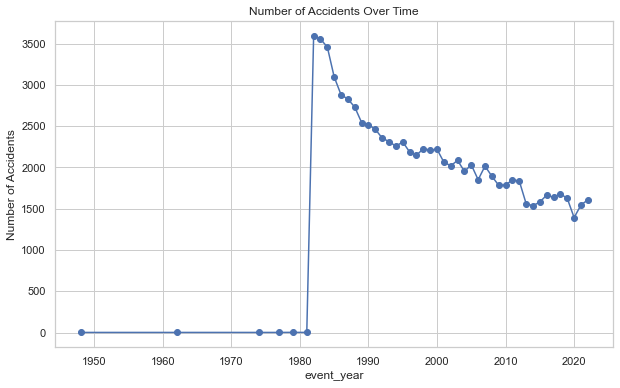

In [370]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create plot
plt.plot(accidents_by_year['event_year'], accidents_by_year['accident_count'], marker='o', linestyle='-')
plt.xlabel('event_year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents Over Time')

# Add grid lines
plt.grid(True)
plt.show()

### Professional vs. Amateur Build Accidents

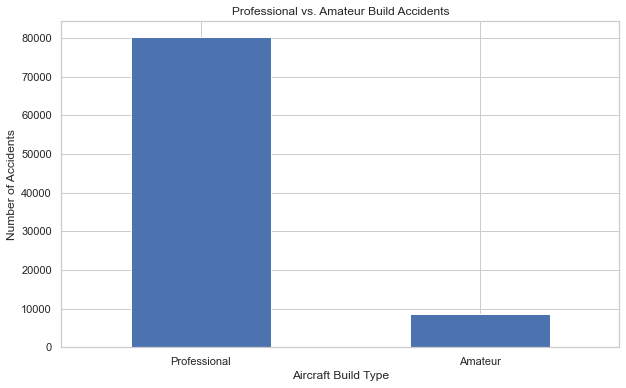

In [371]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create plot
amateur_counts = aviation_df['amateur_built'].value_counts()
amateur_counts.plot(kind = 'bar')

plt.title("Professional vs. Amateur Build Accidents")
plt.ylabel("Number of Accidents")
plt.xlabel("Aircraft Build Type")
plt.xticks([0,1], ["Professional", "Amateur"], rotation=0);

### Professionally Built Aircraft Accidents in Past 30 Years

Explain why we're focusing on past 30 years (based on accidents over time graph above)



In [372]:
# Create new filtered df with all companies
new_filtered_df = aviation_df[(aviation_df["event_year"] >= 1992) & 
                          (aviation_df["purpose_of_flight"].isin(selected_purposes)) & 
                          (aviation_df["amateur_built"] == "No")]

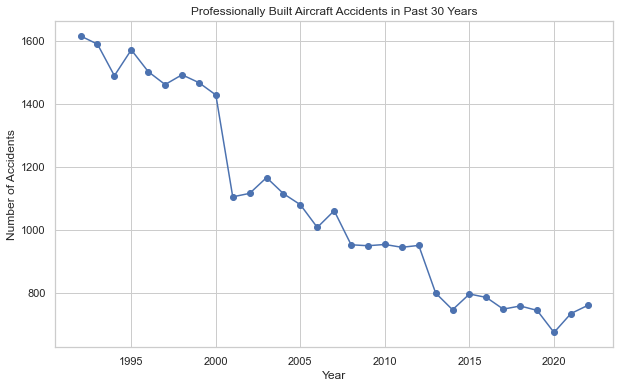

In [373]:
prof_by_year = new_filtered_df.groupby('event_year').size().reset_index(name='accident_count')


#Set the figure size
plt.figure(figsize=(10, 6))

#Create plot
prof = plt.plot(prof_by_year['event_year'], prof_by_year['accident_count'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Professionally Built Aircraft Accidents in Past 30 Years')


#Add grid lines
plt.grid(True)
plt.show()


### Accidents by Injury Type in Past 30 Years

Fatal, serious, and minor injuries are not declining as steeply as we would like. Therefore, further analysis required. 

In [374]:
# Create filtered df by injury type

filtered_fatal_df = new_filtered_df[new_filtered_df["total_fatal_injuries"] > 0]
filtered_serious_df = new_filtered_df[new_filtered_df["total_serious_injuries"] > 0]
filtered_minor_df = new_filtered_df[new_filtered_df["total_minor_injuries"] > 0]
filtered_uninjured_df = new_filtered_df[new_filtered_df["total_uninjured"] > 0]

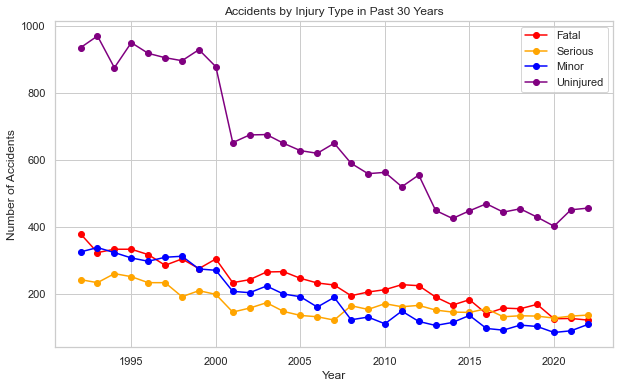

In [375]:
fatal_by_year = filtered_fatal_df.groupby('event_year').size().reset_index(name='accident_count')
serious_by_year = filtered_serious_df.groupby('event_year').size().reset_index(name='accident_count')
minor_by_year = filtered_minor_df.groupby('event_year').size().reset_index(name='accident_count')
uninjured_by_year = filtered_uninjured_df.groupby('event_year').size().reset_index(name='accident_count')

#Set the figure size
plt.figure(figsize=(10, 6))

#Create plot
fatal = plt.plot(fatal_by_year['event_year'], fatal_by_year['accident_count'], color="red", marker='o', linestyle='-')
serious = plt.plot(serious_by_year['event_year'], serious_by_year['accident_count'], color="orange", marker='o', linestyle='-')
minor = plt.plot(minor_by_year['event_year'], minor_by_year['accident_count'], color="blue", marker='o', linestyle='-')
uninjured = plt.plot(uninjured_by_year['event_year'], uninjured_by_year['accident_count'], color="purple", marker='o', linestyle='-')


plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Injury Type in Past 30 Years')
plt.legend(["Fatal", "Serious", "Minor", "Uninjured"], loc = "upper right")

#Add grid lines
plt.grid(True)
plt.show()

### Accidents by Top Aircraft Manufacturers

Show correlation between accidents by top aircraft manufacturers and weather conditions over time

In [376]:
# Define a mapping for the weather conditions
weather_mapping = {"IMC": 0, "VMC": 1, "UNK": 2, None: 3}  # Assigning numeric labels to each condition

# Apply label encoding using the mapping
filtered_df["weather_condition_numeric"] = filtered_df["weather_condition"].map(weather_mapping)


<ipython-input-376-910febc37881>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["weather_condition_numeric"] = filtered_df["weather_condition"].map(weather_mapping)


<ipython-input-377-72e4303a2d71>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["accident_count"] = 1  # Add a new column and set it to 1 for each accident


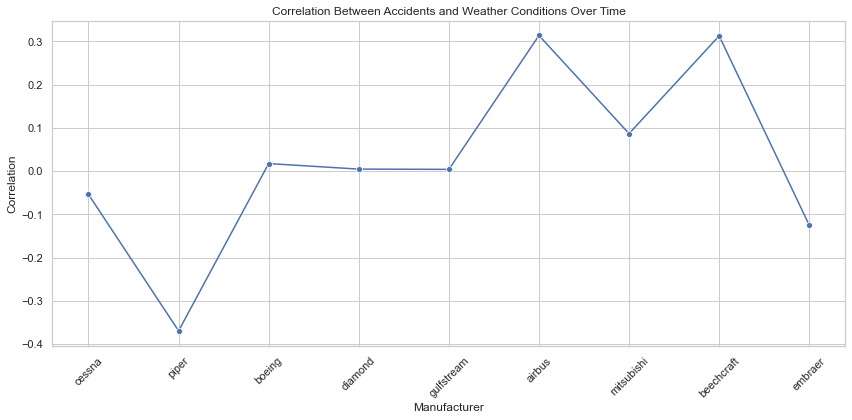

In [377]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named filtered_df with columns 'event_year', 'make', 'weather_condition'

# Step 1: Identify the top aircraft manufacturers
top_manufacturers = filtered_df["make"].value_counts().head(10).index

# Step 2: Calculate "AccidentCount" as the count of accidents for each manufacturer-year combination
filtered_df["accident_count"] = 1  # Add a new column and set it to 1 for each accident
accidents_count_by_manufacturer_year = filtered_df.groupby(["make", "event_year"])["accident_count"].sum().unstack(fill_value=0)

# Step 3: Create a DataFrame to store correlation data
correlation_data = []

# Step 4: Calculate the correlation for each manufacturer
for manufacturer in top_manufacturers:
    accidents_by_year = accidents_count_by_manufacturer_year.loc[manufacturer]
    
    if "weather_condition" in filtered_df.columns:
        # Filter data for the current manufacturer
        manufacturer_data = filtered_df[filtered_df["make"] == manufacturer]
        
        # Calculate the correlation between "accidents_by_year" and "weather_condition"
        correlation = accidents_by_year.corr(manufacturer_data.groupby("event_year")["weather_condition_numeric"].first())
        
        correlation_data.append({'Manufacturer': manufacturer, 'Correlation': correlation})

correlation_df = pd.DataFrame(correlation_data)

# Step 5: Create a visualization to display the correlations over time
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.lineplot(data=correlation_df, x='Manufacturer', y='Correlation', marker='o')
plt.title("Correlation Between Accidents and Weather Conditions Over Time")
plt.xlabel("Manufacturer")
plt.ylabel("Correlation")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()